# Attention in Optimization

In [1]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.ioff()

In [2]:
import mantrap
import mantrap_evaluation
import pandas as pd
import torch

attention_modules = {"closest": mantrap.attention.ClosestModule, 
                     "euclidean": mantrap.attention.EuclideanModule, 
                     "reachability": mantrap.attention.ReachabilityModule, 
                     "none": None}

env, goal, _ = mantrap_evaluation.scenarios.custom_haruki(mantrap.environment.PotentialFieldEnvironment)

eval_df = pd.DataFrame()
num_eval = len(attention_modules.keys())
fig, ax = plt.subplots(1, num_eval, figsize=(num_eval * 9, 9))
for i, (name, attention) in enumerate(attention_modules.items()):
    solver = mantrap.solver.IPOPTSolver(env, goal, attention_module=attention, eval_env=mantrap.environment.SGAN)
    eval_df_k, ego_trajs, ado_trajs = mantrap_evaluation.evaluate(solver, label=name, time_steps=20)
    
    eval_df = eval_df.append(eval_df_k)
    mantrap.visualization.visualize_prediction(env=env, 
                                               ego_planned=torch.mean(ego_trajs, dim=0), 
                                               ado_planned=ado_trajs, 
                                               ego_goal=solver.goal, legend=True, title=name, ax=ax[i])

In [3]:
eval_df

,ado_effort,directness,ego_effort,extra_time,final_distance,minimal_distance,runtime[s]
closest,9.540348,0.976207,0.234914,0.00,0.147733,2.220766,0.060433
euclidean,9.726075,0.975920,0.241975,0.00,0.147680,2.236068,0.058209
reachability,9.368337,0.982773,0.266466,-0.28,0.132604,2.236068,0.678731
none,9.920563,0.979450,0.299642,-0.24,0.138213,2.236068,0.775780


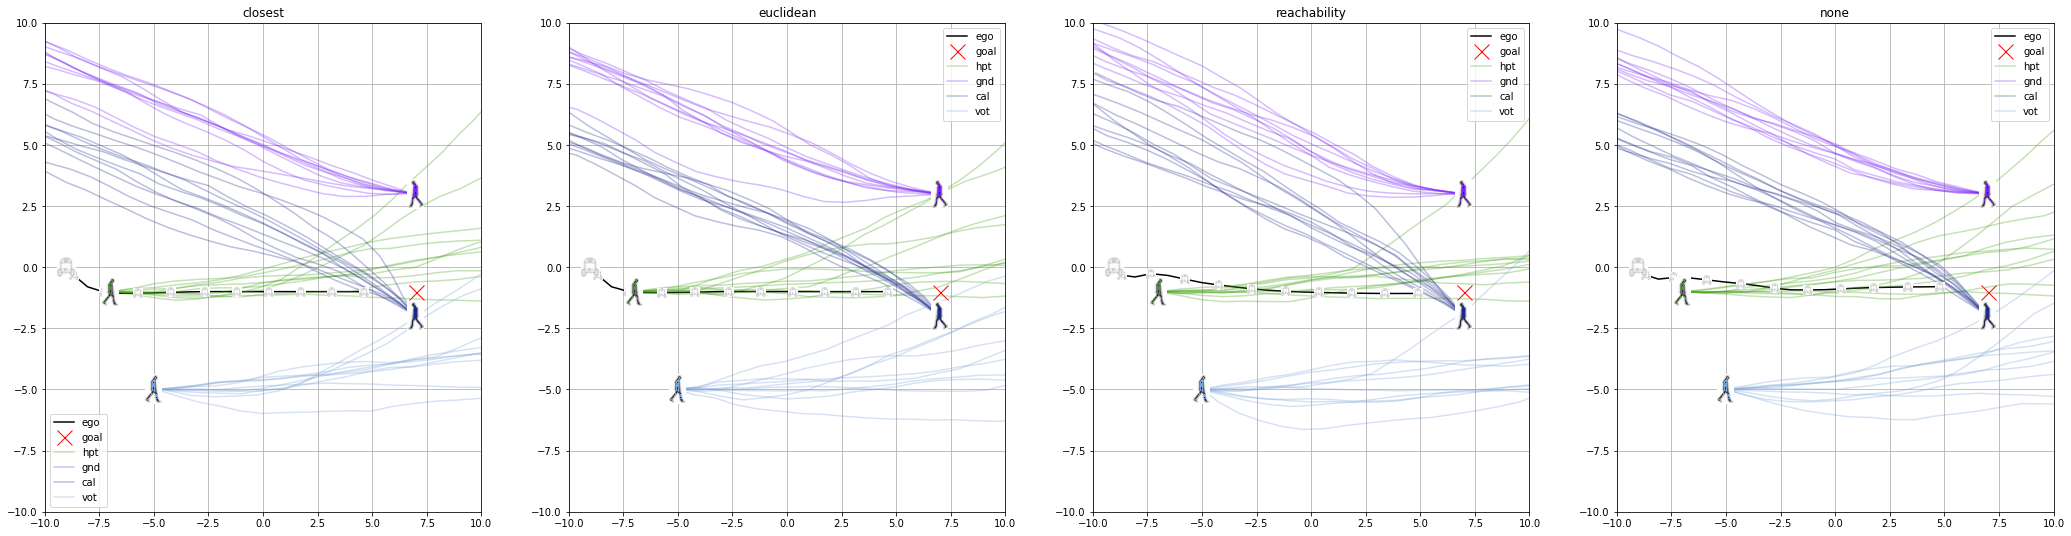

In [4]:
plt.savefig("/Users/sele/Desktop/attention.png", dpi=150)
plt.show()